# Random Sample Imputation - Numerical Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [15]:
# Total missing value in Age
X_train['Age_imputed'][X_train['Age_imputed'].isnull()].shape

(148,)

In [21]:
# Drop all the missing value from Age and fill with random value in Age
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([26.  , 21.  , 40.  , 34.5 , 14.  , 58.  , 35.  , 47.  , 16.  ,
       30.  , 19.  , 29.  , 42.  , 36.  , 58.  , 25.  , 31.  , 44.  ,
       43.  , 30.  , 59.  , 18.  , 34.  , 33.  , 32.  , 45.  , 26.  ,
       47.  , 44.  , 62.  , 30.  ,  3.  , 39.  , 21.  , 22.  , 23.  ,
       25.  , 35.  , 29.  , 23.  , 25.  , 30.  , 37.  , 19.  , 40.  ,
       28.  , 33.  , 30.  , 32.  , 32.5 ,  4.  ,  8.  , 40.  , 56.  ,
       24.  , 28.  , 24.  , 19.  , 36.  , 28.  , 30.  , 41.  , 30.  ,
       56.  , 56.  , 18.  , 23.5 , 25.  , 14.  , 27.  ,  5.  , 47.  ,
       15.  , 12.  , 23.  , 28.  , 26.  , 36.  , 30.5 , 20.  , 27.  ,
       70.5 , 40.  , 18.  , 31.  , 33.  , 24.  , 36.  , 22.  ,  3.  ,
       11.  ,  2.  , 48.  , 19.  , 39.  , 15.  , 14.  , 27.  , 21.  ,
       23.  , 59.  , 21.  , 62.  , 56.  , 17.  , 33.  , 30.  , 24.  ,
       32.  , 34.  , 61.  , 33.  ,  0.75, 47.  , 50.  , 30.  , 29.  ,
       42.  , 18.  , 25.  , 14.  , 31.  , 53.  , 28.  , 45.5 , 38.  ,
       50.  , 20.  ,

In [24]:
if X_train['Age_imputed'].isnull().any():
    X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

if X_test['Age_imputed'].isnull().any():
    X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [25]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,24.0
493,71.0,49.5042,71.0
527,NaN,221.7792,25.0


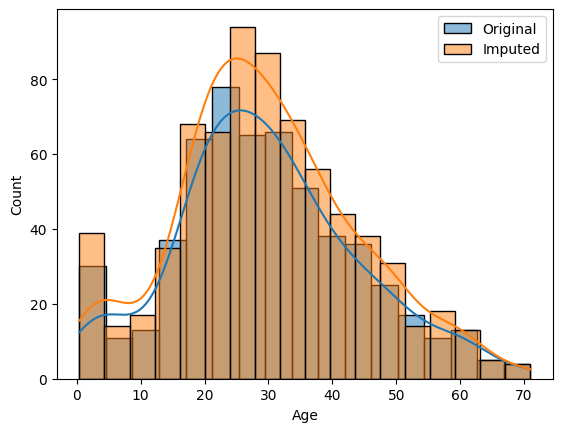

In [30]:
sns.histplot(X_train['Age'],label='Original',kde=True)
sns.histplot(X_train['Age_imputed'],label = 'Imputed',kde=True)

plt.legend()
plt.show()

In [32]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.44927471653293


In [34]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.274018
Age,71.512440,204.349513,204.349513
Age_imputed,57.274018,204.349513,203.449275


<Axes: >

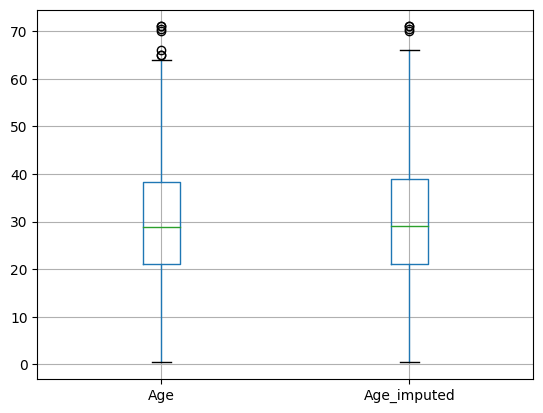

In [35]:
X_train[['Age', 'Age_imputed']].boxplot()

In [39]:
# assuming observation is a dictionary
# To get similar output on similar input
observation = {'Fare': 20}
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# Random Sample Imputation - Categorical Data

In [41]:
data = pd.read_csv('/content/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [42]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [43]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [44]:
X = data
y = data['SalePrice']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [47]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
949,TA,TA,197500,TA,TA
592,NaN,TA,138000,TA,NaN
289,NaN,TA,153575,TA,NaN
985,NaN,TA,125000,TA,NaN
1159,TA,Gd,185000,Gd,TA


In [49]:
# To get all missing value in GaragQual_imputed
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]

,GarageQual_imputed
127,NaN
99,NaN
921,NaN
1179,NaN
1143,NaN
...,...
434,NaN
942,NaN
1326,NaN
1349,NaN


In [51]:
X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

array(['TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA'],
      dtype=object)

In [55]:
if X_train['GarageQual_imputed'].isnull().any():
    X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

if X_test['GarageQual_imputed'].isnull().any():
    X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


if X_train['FireplaceQu_imputed'].isnull().any():
    X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values


if X_test['FireplaceQu_imputed'].isnull().any():
    X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [56]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [57]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [58]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.537598
Fa,0.040917,0.054994
Po,0.027823,0.038159
Ex,0.024550,0.030303


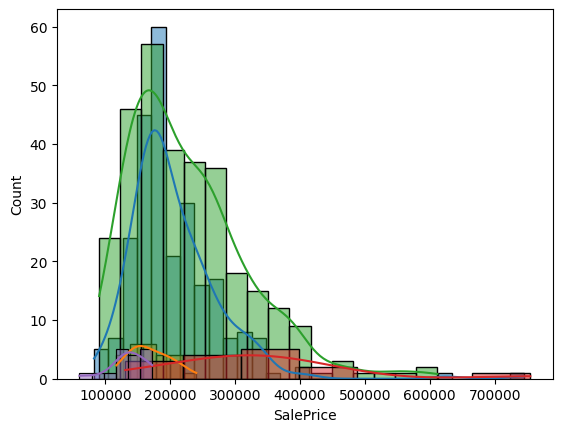

In [60]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.histplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],kde=True,label=category)
plt.show()

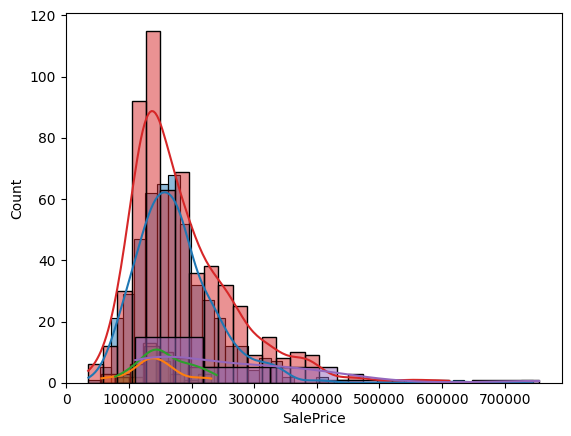

In [61]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.histplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],kde=True,label=category)
plt.show()